In [1]:
# hücre hücre olarak tanımlıyorum aynı kod 

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
import os


In [24]:
print("********** Load csv **********")

# Load the labels.csv file
labels_df = pd.read_csv("D:\Visual Studio Code Projelerim\Aygaz-Projem\dog-breed-identification\labels.csv")

# Assuming your images are in a folder called "images"
# Load the images and create a dataframe with pixel values
# Folder containing images
images_folder = "D:\Visual Studio Code Projelerim\Aygaz-Projem\dog-breed-identification\images"

# Initialize lists to store image data
image_data = []

# Hedef boyutu belirtin
hedef_boyut = (128, 128)


# Klasördeki her bir resmi yeniden boyutlandırın
for dosya_adı in os.listdir(images_folder):
    dosya_yolu = os.path.join(images_folder, dosya_adı)
    
    # Dosyanın bir resim dosyası olduğunu kontrol edin
    if os.path.isfile(dosya_yolu) and dosya_adı.endswith(('.jpg', '.jpeg', '.png')):
        try:
            # Resmi açın
            resim = Image.open(dosya_yolu)
            
            # Resmi yeniden boyutlandırın
            yeniden_boyutlandirilmis_resim = resim.resize(hedef_boyut)
            
            # Yeniden boyutlandırılmış resmi kaydedin (varsa orijinal dosyanın üzerine yazacaktır, dikkatli olun)
            yeniden_boyutlandirilmis_resim.save(dosya_yolu)
            
        except Exception as e:
            print(f"Hata: {e} - Dosya: {dosya_adı}")

print("********** Resimler Yeniden Boyutlandirildi 128x128 **********")


********** Load csv **********
********** Resimler Yeniden Boyutlandirildi 128x128 **********


In [25]:
# Loop through each image ID in the labels dataframe
for img_id in labels_df["id"]:
    # Construct the image file path
    img_path = os.path.join(images_folder, f"{img_id}.jpg")

    # Load the image and convert it to grayscale
    img = Image.open(img_path).convert("RGB")

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Append the image data to the list
    image_data.append(img_array)

# Add the pixel values to the labels dataframe
labels_df["pixels"] = image_data

# Display the updated dataframe
print(labels_df.head())

                                 id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                              pixels  
0  [[[158, 105, 55], [179, 128, 75], [183, 136, 8...  
1  [[[66, 38, 35], [65, 38, 29], [68, 41, 24], [7...  
2  [[[116, 105, 109], [114, 105, 106], [112, 109,...  
3  [[[78, 83, 77], [98, 103, 97], [53, 55, 50], [...  
4  [[[84, 84, 82], [83, 83, 81], [81, 81, 79], [7...  


In [26]:
# Use LabelEncoder to convert the 'breed' column to numerical labels
label_encoder = LabelEncoder()
labels_df['encoded_breed'] = label_encoder.fit_transform(labels_df['breed'])

# Display the updated dataframe
print(labels_df.head())


                                 id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                              pixels  encoded_breed  
0  [[[158, 105, 55], [179, 128, 75], [183, 136, 8...             19  
1  [[[66, 38, 35], [65, 38, 29], [68, 41, 24], [7...             37  
2  [[[116, 105, 109], [114, 105, 106], [112, 109,...             85  
3  [[[78, 83, 77], [98, 103, 97], [53, 55, 50], [...             15  
4  [[[84, 84, 82], [83, 83, 81], [81, 81, 79], [7...             49  


In [27]:
# Use get_dummies to perform one-hot encoding on the 'breed' column
one_hot_encoded = pd.get_dummies(labels_df['breed'], prefix='breed')

# Concatenate the one-hot encoded columns with the original dataframe
labels_df = pd.concat([labels_df, one_hot_encoded], axis=1)

# Display the updated dataframe
print(labels_df.head())

                                 id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                              pixels  encoded_breed  \
0  [[[158, 105, 55], [179, 128, 75], [183, 136, 8...             19   
1  [[[66, 38, 35], [65, 38, 29], [68, 41, 24], [7...             37   
2  [[[116, 105, 109], [114, 105, 106], [112, 109,...             85   
3  [[[78, 83, 77], [98, 103, 97], [53, 55, 50], [...             15   
4  [[[84, 84, 82], [83, 83, 81], [81, 81, 79], [7...             49   

   breed_affenpinscher  breed_afghan_hound  breed_african_hunting_dog  \
0                False               False                      False   
1                False               False                      False   
2          

In [28]:
# Split the dataset into features (X) and target (y)
X = np.array(labels_df["pixels"].tolist())  # Features
y = labels_df["encoded_breed"]  # Target for Label Encoding

# If using One-Hot Encoding, use the following line instead
# y = labels_df[one_hot_encoded.columns]

# Split the dataset into training (80%), testing (10%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Display the updated shapes of the sets
print("Normalized X_train shape:", X_train.shape)
print("Normalized X_val shape:", X_val.shape)
print("Normalized X_test shape:", X_test.shape)


X_train shape: (8177, 128, 128, 3)
y_train shape: (8177,)
X_val shape: (1022, 128, 128, 3)
y_val shape: (1022,)
X_test shape: (1023, 128, 128, 3)
y_test shape: (1023,)
Normalized X_train shape: (8177, 128, 128, 3)
Normalized X_val shape: (1022, 128, 128, 3)
Normalized X_test shape: (1023, 128, 128, 3)


In [29]:
# Build the CNN model
model = Sequential()

# Add Convolutional layers with MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the feature maps
model.add(Flatten())

# Add Dense layers with Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))  # Assuming there are 120 dog breeds

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 4.7932 - accuracy: 0.0082
Epoch 1: val_accuracy improved from -inf to 0.00783, saving model to best_model.h5


c:\Users\kocal\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - 957s 4s/step - loss: 4.7932 - accuracy: 0.0082 - val_loss: 4.7843 - val_accuracy: 0.0078
Epoch 2/50
256/256 [==============================] - ETA: 0s - loss: 4.7820 - accuracy: 0.0110
Epoch 2: val_accuracy improved from 0.00783 to 0.01663, saving model to best_model.h5
256/256 [==============================] - 937s 4s/step - loss: 4.7820 - accuracy: 0.0110 - val_loss: 4.7740 - val_accuracy: 0.0166
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 4.7253 - accuracy: 0.0176
Epoch 3: val_accuracy improved from 0.01663 to 0.02153, saving model to best_model.h5
256/256 [==============================] - 1145s 4s/step - loss: 4.7253 - accuracy: 0.0176 - val_loss: 4.6554 - val_accuracy: 0.0215
Epoch 4/50
256/256 [==============================] - ETA: 0s - loss: 4.6050 - accuracy: 0.0258
Epoch 4: val_accuracy improved from 0.02153 to 0.02838, saving model to best_model.h5
256/256 [==============================] - 1224s 5s/step 

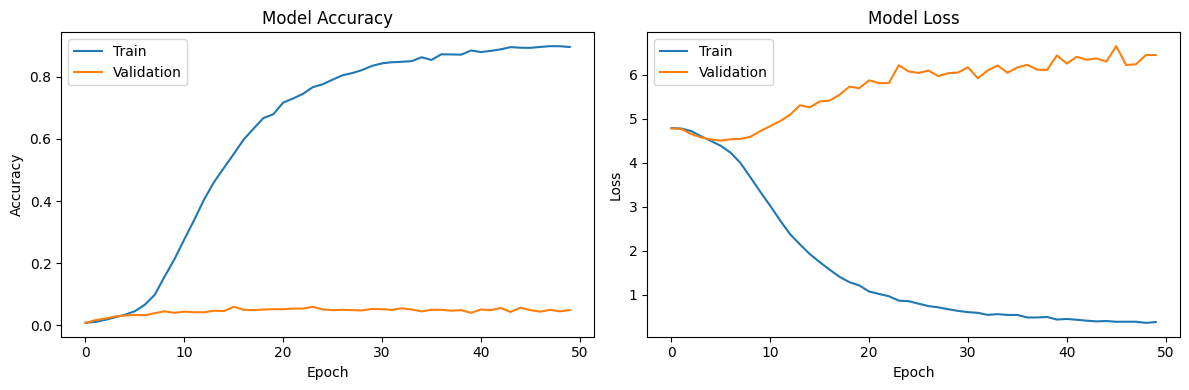

In [30]:
from keras.callbacks import ModelCheckpoint

# Assume you have already defined your model and X_train, y_train, X_val, y_val

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Compile your model (if not already compiled)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[checkpoint])

# After training, you can load the best model using the following code:
best_model = keras.models.load_model('best_model.h5')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [32]:
model.save('best_model_copy.h5')

c:\Users\kocal\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

# Custom KerasClassifier
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        # Training logic for your Keras model can be added here if needed
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        # Assuming your Keras model predicts class probabilities
        return np.argmax(self.keras_model.predict(X), axis=1)

# Load the pre-trained Keras model
pretrained_model = load_model('./best_model_copy.h5')  # Adjust the file path accordingly

# Create a KerasClassifier instance
keras_classifier = KerasClassifier(keras_model=pretrained_model)

# Assuming your images have dimensions (samples, height, width, channels)
# Flatten each image into a 1D array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create RandomForestClassifier
rf_model = RandomForestClassifier()

# Define hyperparameters to search
param_grid_new = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the custom KerasClassifier
grid_new = GridSearchCV(estimator=rf_model, param_grid=param_grid_new, cv=3)
grid_new_result = grid_new.fit(X_train_flat, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_new_result.best_score_, grid_new_result.best_params_))

# Make predictions on the test set using the best model
model_with_best_parameters_withGridSearchCV = grid_new_result.best_estimator_
y_pred_new = model_with_best_parameters_withGridSearchCV.predict(X_test_flat)

# Get accuracy score
accuracy_withBestParam = accuracy_score(y_test, y_pred_new)
print(f"Accuracy: {accuracy_withBestParam}")


Best: 0.049041 using {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.047898338220918865
